In [232]:
import torch
import numpy as np
from timeit import default_timer as timer
from matplotlib import pyplot as plt

cuda0 = torch.device('cuda:0')
n0=600
n1=800
its=100

## Pytorch evaluation

In [233]:
def torch_dist(x):
    return torch.norm(x, dim=0) - 1.0

def torch_calc(a, b, iterations):
    for i in range(iterations):
        a += dist(a)*b


In [234]:
# CPU test
a = torch.linspace(0.0, 1.0, steps=3*n0*n1, device='cpu').reshape(3,n0,n1)
t0 = timer()
torch_calc(a, a, its)
t_torch_cpu = timer() - t0
print(t_torch_cpu*1000, 'ms')

5472.692999999708 ms


In [235]:
# GPU test
b = torch.linspace(0.0, 1.0, steps=3*n0*n1, device=cuda0).reshape(3,n0,n1)
t0 = timer()
torch_calc(b, b, its)
t_torch_gpu = timer() - t0
print(t_torch_gpu*1000, 'ms')

24.73270000064076 ms


## Numpy evaluation

In [236]:
def np_dist(x):
    return np.linalg.norm(x, axis=0) - 1.0

def np_calc(a, b, iterations):
    for i in range(iterations):
        a += np_dist(a)*b


In [237]:
c = np.linspace(0.0, 1.0, 3*n0*n1).reshape(3,n0,n1)
t0 = timer()
np_calc(c, c, its)
t_np = timer() - t0
print(t_np*1000, 'ms')

2168.886399999792 ms


## Conclusion

([<matplotlib.axis.XTick at 0x1cf9dc1cfc8>,
 [Text(0, 0, 'torch:cpu'), Text(0, 0, 'torch:gpu'), Text(0, 0, 'numpy')])

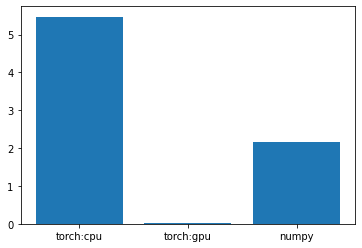

In [238]:
objs = [t_torch_cpu, t_torch_gpu, t_np]
x_pos = range(len(objs))
plt.bar(x_pos,[t_torch_cpu, t_torch_gpu, t_np])
plt.xticks(x_pos, ['torch:cpu', 'torch:gpu', 'numpy'])

In [239]:
t_np/t_torch_gpu

87.69307030544994